## Plotting Pre-work

In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

df = pandas.read_csv("../data/reviews.csv", parse_dates=['Timestamp'])
df.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Plotting by Day

In [2]:
df['Day'] = df['Timestamp'].dt.date
grouped_data =  df.groupby("Day").mean()
grouped_data.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


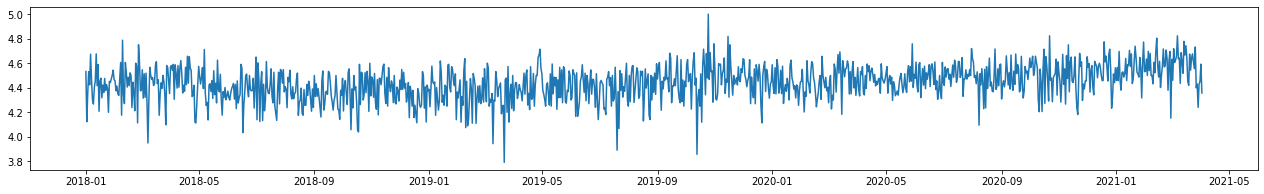

In [3]:
plt.figure(figsize=(22,3))
plt.plot(grouped_data.index, grouped_data['Rating'])

## Plotting By Week

In [4]:
# This will be an issue as week number 1 of multiple years will be aggregated with each other 
df['Week'] = df['Timestamp'].dt.isocalendar().week


In [5]:
df['Week'] = df['Timestamp'].dt.strftime('%Y-%U')
grouped_data_week = df.groupby("Week").mean()
# grouped_data_week.head()

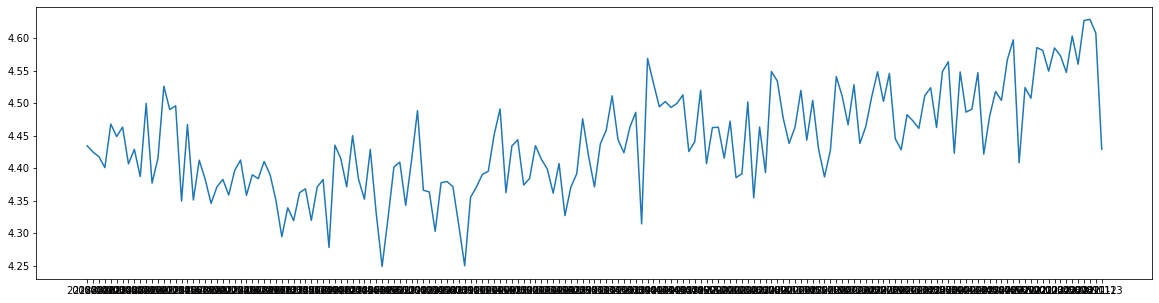

In [6]:
plt.figure(figsize=(20,5))
plt.plot(grouped_data_week.index, grouped_data_week['Rating'])

## Plotting by Month

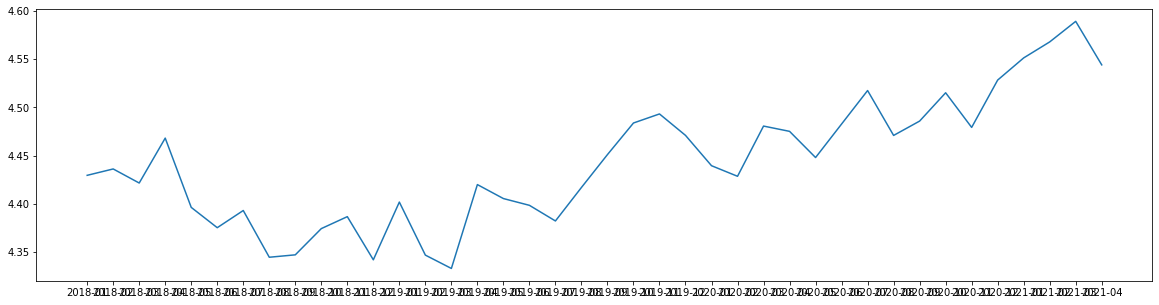

In [7]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
grouped_data_month = df.groupby("Month").mean()
plt.figure(figsize=(20,5))
plt.plot(grouped_data_month.index, grouped_data_month['Rating'])

## Average Rating by Month by Course

In [8]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
df

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04
...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01


In [9]:
grouped_data_month_course = df.groupby(['Month', 'Course Name']).mean()
grouped_data_month_course

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

In [10]:
# UnStack will move second index from row to column to generate tabular data
grouped_data_month_course = df.groupby(['Month', 'Course Name']).mean().unstack()
grouped_data_month_course.head()

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   

                                                                  \
Course Name Interactive Data Visualization with Python and Bokeh   
Month                                                              
2018-01                                               4.285714     
2018-02                                               4.157895     
2018-03                                               4.266667     
2018-04                                               4.428571     
2018-05                                               4.107143     

                                                                      \
Course Name Learn GIS in One Hour Python for Beginners with Examples   
Month                                                                  
2018-01                  4.236842                           4.355422   
2018-02                  4.437500                           4.363095   
2018-03                  4.166667                           4.357143   
2018-04                  4.250000                           4.378947   
2018-05                  4.666667                           4.362654   

                                                                        \
Course Name The Complete Python Course: Build 10 Professional OOP Apps   
Month                                                                    
2018-01                                                    NaN           
2018-02                                                    NaN           
2018-03                                                    NaN           
2018-04                                                    NaN           
2018-05                                                    NaN           

                                                                      
Course Name The Python Mega Course: Build 10 Real World Applications  
Month                                                                 
2018-01                                               4.457368        
2018-02                                               4.481070        
2018-03                                               4.447037        
2018-04                                               4.507412        
2018-05                                               4.422085

<AxesSubplot:xlabel='Month'>

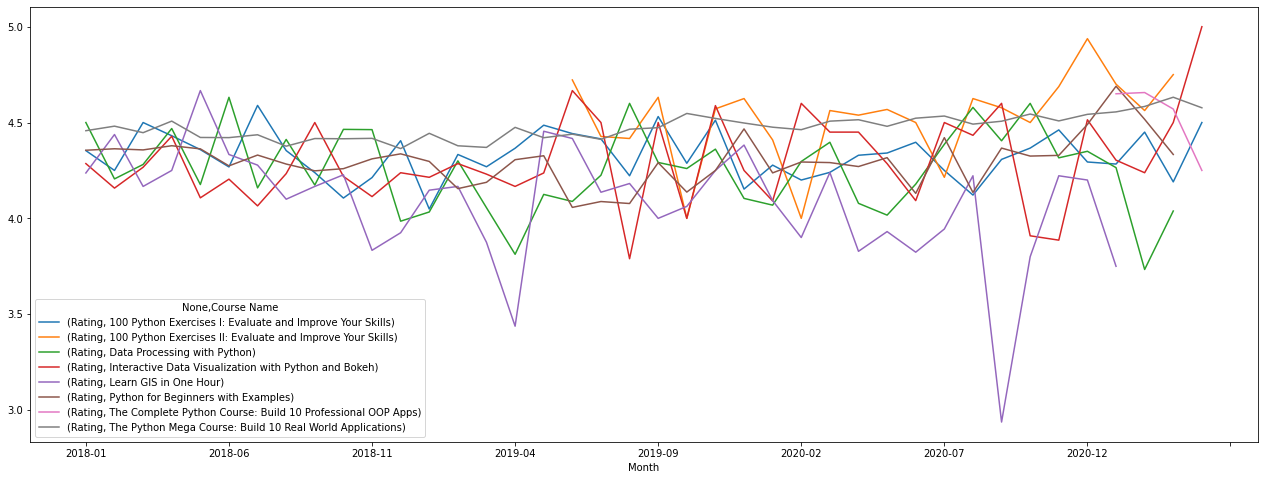

In [11]:
# to plot such data that have multiple columns that needs to be plotted use data Frame plot 
# instead of matplot
grouped_data_month_course.plot(figsize=(22,8))

<AxesSubplot:xlabel='Month'>

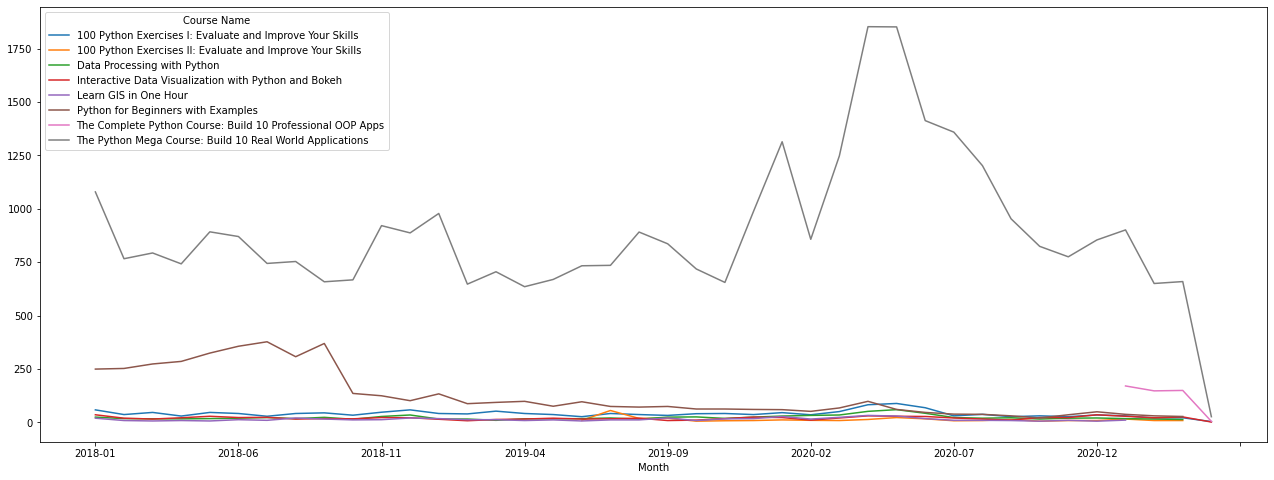

In [12]:
# for plotting count we need to extract single column otherwise unstack will create two index in cloumns side
grouped_data_month_course = df.groupby(['Month', 'Course Name'])['Rating'].count().unstack()
grouped_data_month_course.head()
grouped_data_month_course.plot(figsize=(22,8))

## What Day People are happiest ?

In [13]:
df

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04
...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01


In [14]:
df['Day'] = df['Timestamp'].dt.weekday

gg = df.groupby('Day').mean()
gg

,Rating
Day,
0,4.449335
1,4.446240
2,4.427452
3,4.437880
4,4.455207
5,4.440274
6,4.439097


0
1
2
3
4
5
6
['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']


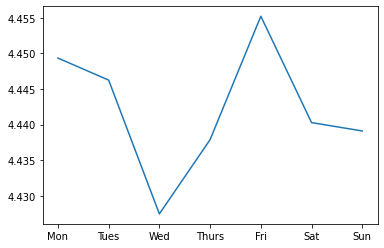

In [15]:
week = {0 : "Mon", 1 : "Tues", 2 : "Wed", 3: "Thurs", 4: "Fri", 5: "Sat", 6 : 'Sun'}
d = []
for x in gg.index:
    print(x)
    d.append(week.get(x))
print(d)
# d = gg.index.apply(lambda x : week.get(x))
# d
plt.plot(d, gg['Rating'])

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='WeekDay')


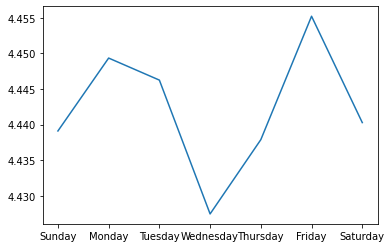

In [16]:
#### Other method
df['WeekDay'] = df['Timestamp'].dt.strftime("%A")
df['DayNum']= df['Timestamp'].dt.strftime("%w")
df_DD = df.groupby(['WeekDay', "DayNum"]).mean()
df_DD = df_DD.sort_values("DayNum")
print(df_DD.index.get_level_values(0))
plt.plot(df_DD.index.get_level_values(0), df_DD['Rating'])

# Other Type of Plots

<BarContainer object of 7 artists>

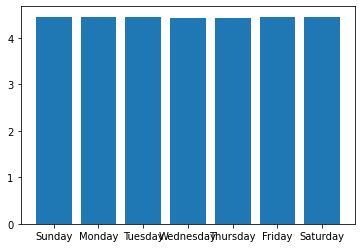

In [17]:
# bar graph
# not too much useful in this scenario because difference is too low
plt.bar(df_DD.index.get_level_values(0), df_DD['Rating'])

In [19]:
# Number of Rating by Course
rate_by_course = df.groupby('Course Name').count()
rate_by_course['Rating']


Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x12118f70>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015484, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

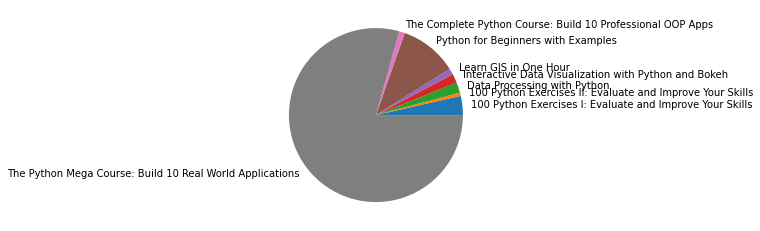

In [21]:
plt.pie(rate_by_course['Rating'], labels=rate_by_course.index)